# 정보해결사(InfoSolvers)
### Credit Card Fraud Detection(EDA)
#### 패키지 불러오기

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 200)

In [2]:
# 파일 불러오기
df = pd.read_csv('~/workspace/230529 Infosolver/application_data.csv')

In [3]:
#데이터 확인
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
#데이터의 형태 확인
df.shape

(307511, 122)

In [5]:
#정보 확인, dtypes
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [6]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [7]:
# 여기에서는 많은 정보가 전달되지 않았습니다. 퍼센트를 확인해보겠습니다.
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

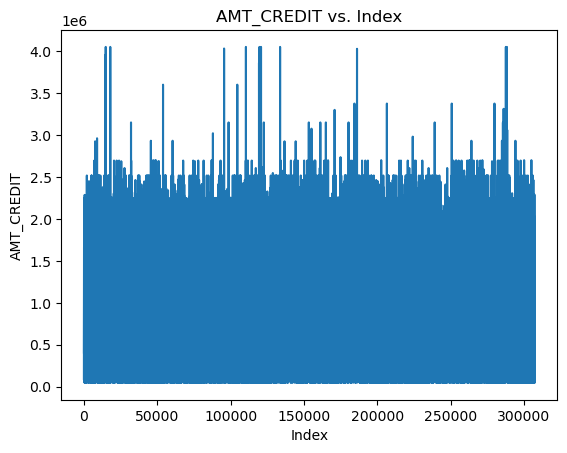

In [8]:
# 데이터 프레임에서 X와 Y 데이터 추출
X = df.index
Y = df['AMT_CREDIT']

# 그래프 생성 및 데이터 시각화
plt.plot(X, Y)
plt.xlabel('Index')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_CREDIT vs. Index')
plt.show()

In [9]:
import numpy as np

# "AMT_CREDIT" 열의 사분위수 계산
quantiles = np.percentile(df['AMT_CREDIT'], [25, 50, 75])

# 사분위수로 나누는 함수 정의
def classify_credit_amount(amt):
    if amt <= quantiles[0]:
        return '1st Quartile'
    elif amt <= quantiles[1]:
        return '2nd Quartile'
    elif amt <= quantiles[2]:
        return '3rd Quartile'
    else:
        return '4th Quartile'

# "AMT_CREDIT" 열에 사분위수로 나눈 결과 추가
df['Credit_Amount_Category'] = df['AMT_CREDIT'].apply(classify_credit_amount)

# 결측치 확인
missing_values = df['AMT_CREDIT'].isnull().sum()

print("사분위수:", quantiles)
print("결측치 개수:", missing_values)


사분위수: [270000. 513531. 808650.]
결측치 개수: 0


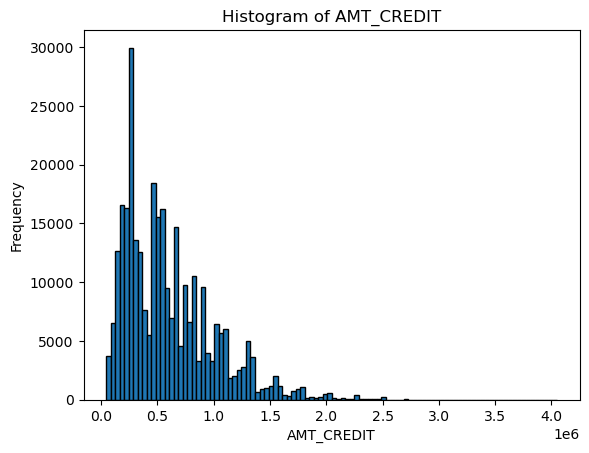

In [10]:
# 히스토그램 그리기
plt.hist(df['AMT_CREDIT'], bins=100, edgecolor='k')
plt.xlabel('AMT_CREDIT')
plt.ylabel('Frequency')
plt.title('Histogram of AMT_CREDIT')
plt.show()


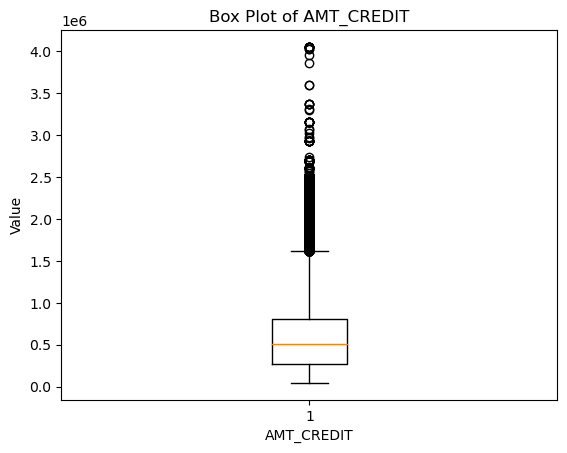

In [11]:
# 'AMT_CREDIT' 열의 플롯 박스 그리기
plt.boxplot(df['AMT_CREDIT'].dropna())
plt.xlabel('AMT_CREDIT')
plt.ylabel('Value')
plt.title('Box Plot of AMT_CREDIT')
plt.show()


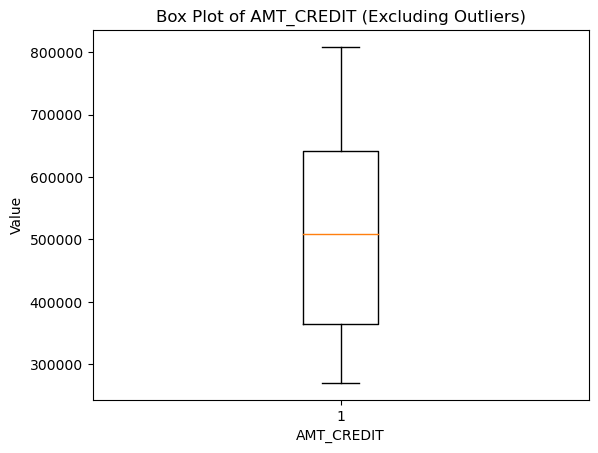

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# 이상치를 제외한 'AMT_CREDIT' 열의 값을 구하기
lower_bound = np.percentile(df['AMT_CREDIT'].dropna(), 25)  # 1사분위 값
upper_bound = np.percentile(df['AMT_CREDIT'].dropna(), 75)  # 3사분위 값
filtered_data = df[(df['AMT_CREDIT'] >= lower_bound) & (df['AMT_CREDIT'] <= upper_bound)]

# 'AMT_CREDIT' 열의 플롯 박스 그리기
plt.boxplot(filtered_data['AMT_CREDIT'].dropna())
plt.xlabel('AMT_CREDIT')
plt.ylabel('Value')
plt.title('Box Plot of AMT_CREDIT (Excluding Outliers)')
plt.show()


In [13]:
filtered_data.shape

(160455, 123)

In [14]:
num = filtered_data['AMT_CREDIT']

Q1 = num.quantile(.25)
Q2 = num.quantile(.5)
Q3 = num.quantile(.75)
IQR = Q3 - Q1
MAX = Q3 + (1.5 * IQR)

print('Q1 = ', Q1)  # 제 1사분위수
print('Q2 = ', Q2)  # 중위수
print('Q3 = ', Q3)   #제 3사분위수
print('IQR = ', IQR)  # 사분위간 범위
print('MAX = ', MAX)  # 최댓값

Q1 =  364896.0
Q2 =  508495.5
Q3 =  641173.5
IQR =  276277.5
MAX =  1055589.75


In [15]:
# 등급 분류 함수
def classify_credit(amount):
    if amount < Q1:
        return 0.25
    elif amount < Q2:
        return 0.5
    elif amount < Q3:
        return 0.75
    else:
        return 1

# 'AMT_CREDIT' 열을 기준으로 등급 분류
df['AMT_CREDIT_RANK'] = df['AMT_CREDIT'].apply(classify_credit)

In [16]:
df['AMT_CREDIT_RANK']

0         0.50
1         1.00
2         0.25
3         0.25
4         0.75
          ... 
307506    0.25
307507    0.25
307508    1.00
307509    0.50
307510    1.00
Name: AMT_CREDIT_RANK, Length: 307511, dtype: float64

In [17]:
import statsmodels.api as sm

# 독립변수와 종속변수 설정
X = df['AMT_CREDIT_RANK']
y = df['TARGET']

# 상수(intercept) 추가
X = sm.add_constant(X)

# 회귀모델 학습
model = sm.OLS(y, X)
results = model.fit()

# 회귀분석 결과 출력
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 TARGET   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     96.28
Date:                Mon, 29 May 2023   Prob (F-statistic):           1.01e-22
Time:                        21:56:25   Log-Likelihood:                -36399.
No. Observations:              307511   AIC:                         7.280e+04
Df Residuals:                  307509   BIC:                         7.282e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0900      0.001     

**회귀분석 결과를 살펴보면 다음과 같은 정보가 제공됩니다:**

- **R-squared (R 제곱):** 0.000  
   - R-squared는 종속변수의 변동성 중 독립변수로 설명할 수 있는 비율을 나타냅니다. 0.000으로 매우 낮은 값을 가지고 있으므로, 독립변수 `AMT_CREDIT_RANK`가 종속변수 `TARGET`의 변동성을 설명하는 데 거의 기여하지 않는 것으로 해석됩니다.

- **F-statistic (F 통계량):** 96.28  
   - F-statistic은 회귀모형의 유의성을 검정하는 값입니다. Prob (F-statistic) 값이 1.01e-22로 매우 작으므로, 회귀모형이 전체적으로 유의미한 것으로 나타납니다.

- **회귀계수 (coef):** const = 0.0900, AMT_CREDIT_RANK = -0.0147  
   - 회귀계수는 독립변수와 종속변수 간의 관계를 나타내는 값입니다. 여기서 `AMT_CREDIT_RANK`의 회귀계수는 -0.0147로 음의 값이며, 이는 `AMT_CREDIT_RANK`가 증가할수록 `TARGET` 값이 감소하는 관계를 나타냅니다.

- **P-value (P-값):** const < 0.001, AMT_CREDIT_RANK < 0.001  
   - P-value는 각 독립변수의 유의성을 나타내는 값입니다. P-value 값이 0.05보다 작으면 해당 독립변수가 유의미한 것으로 간주됩니다. 여기서는 모든 P-value가 0.001보다 작으므로 `const`와 `AMT_CREDIT_RANK` 모두 유의미한 변수로 나타납니다.

**결론적으로, 회귀분석 결과에서는 `AMT_CREDIT_RANK`와 `TARGET` 간의 유의미한 관계가 나타나지만, R-squared 값이 매우 낮아 독립변수가 종속변수의 변동성을 설명하는 데 큰 영향을 미치지 않는 것으로 나타납니다. 따라서, 해당 회귀모델은 `TARGET` 값을 예측하는 데 큰 도움이 되지 않을 수 있습니다. 추가적인 분석이 필요할 수 있습니다.**

In [18]:
df = pd.read_csv('~/workspace/230529 Infosolver/application_data.csv')

In [19]:
df['NAME_INCOME_TYPE'].unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

In [20]:
missing_values = df['AMT_GOODS_PRICE'].isnull().sum()
missing_values

278

In [21]:
df = df.dropna(subset=['AMT_GOODS_PRICE'])

In [22]:
df.shape

(307233, 122)

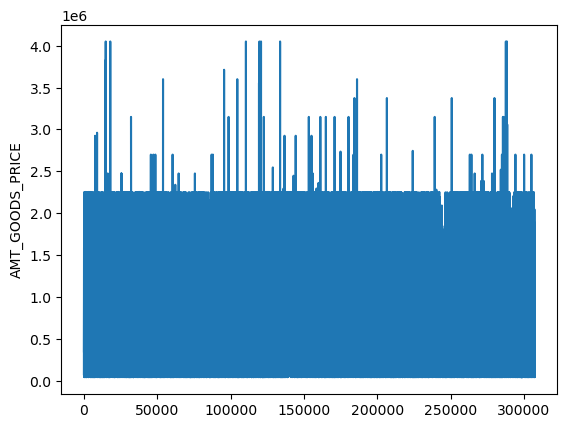

In [23]:
plt.plot(df['AMT_GOODS_PRICE'])
plt.ylabel('AMT_GOODS_PRICE')
plt.show()

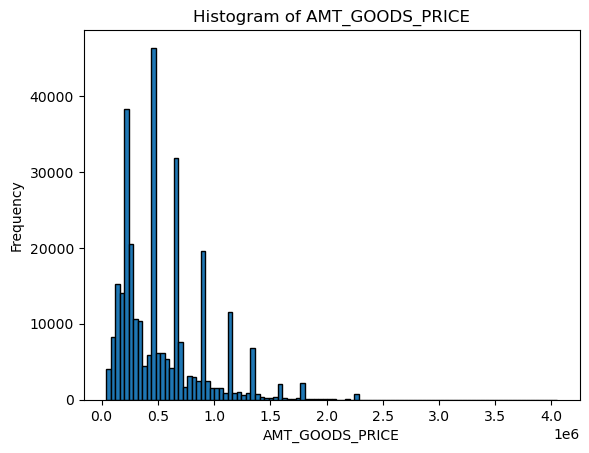

In [24]:
# 히스토그램 그리기
plt.hist(df['AMT_GOODS_PRICE'], bins=100, edgecolor='k')
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('Frequency')
plt.title('Histogram of AMT_GOODS_PRICE')
plt.show()

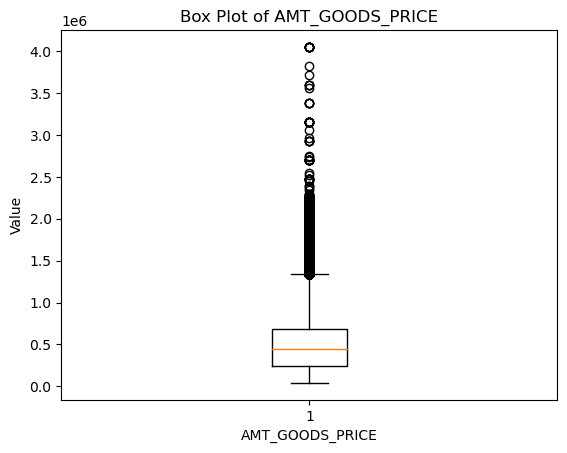

In [25]:
# 'AMT_CREDIT' 열의 플롯 박스 그리기
plt.boxplot(df['AMT_GOODS_PRICE'].dropna())
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('Value')
plt.title('Box Plot of AMT_GOODS_PRICE')
plt.show()

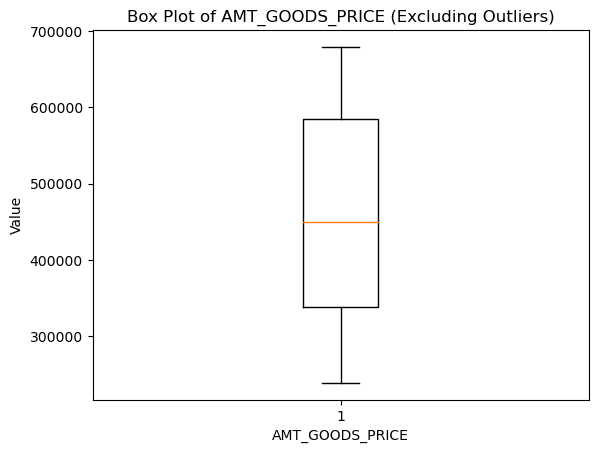

In [26]:
# 이상치를 제외한 'AMT_CREDIT' 열의 값을 구하기
lower_bound = np.percentile(df['AMT_GOODS_PRICE'].dropna(), 25)  # 1사분위 값
upper_bound = np.percentile(df['AMT_GOODS_PRICE'].dropna(), 75)  # 3사분위 값
filtered_data = df[(df['AMT_GOODS_PRICE'] >= lower_bound) & (df['AMT_GOODS_PRICE'] <= upper_bound)]

# 'AMT_CREDIT' 열의 플롯 박스 그리기
plt.boxplot(filtered_data['AMT_GOODS_PRICE'].dropna())
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('Value')
plt.title('Box Plot of AMT_GOODS_PRICE (Excluding Outliers)')
plt.show()

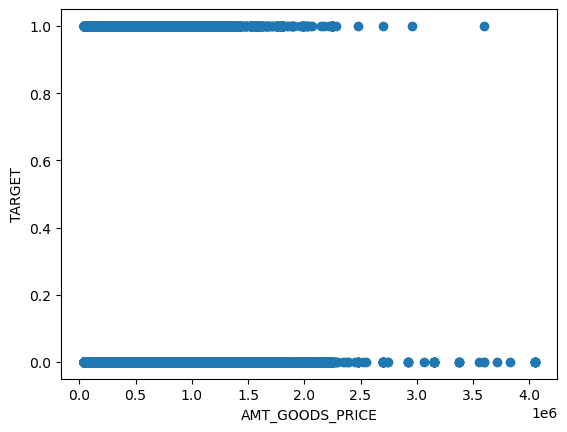

In [27]:
plt.scatter(df['AMT_GOODS_PRICE'], df['TARGET'])
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('TARGET')
plt.show()

In [28]:
X = df['AMT_GOODS_PRICE']
y = df['TARGET']

X = sm.add_constant(X)  # 상수항 추가

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 TARGET   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     483.6
Date:                Mon, 29 May 2023   Prob (F-statistic):          4.15e-107
Time:                        21:56:45   Log-Likelihood:                -36180.
No. Observations:              307233   AIC:                         7.236e+04
Df Residuals:                  307231   BIC:                         7.239e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0965      0.001    1

회귀분석 결과를 살펴보면 다음과 같은 정보가 제공됩니다:

- **R-squared (R 제곱):** 0.002
  - R-squared는 종속변수의 변동성 중 독립변수로 설명할 수 있는 비율을 나타냅니다. 0.002로 매우 낮은 값을 가지고 있으므로, 독립변수 'AMT_GOODS_PRICE'가 종속변수 'TARGET'의 변동성을 설명하는 데 거의 기여하지 않는 것으로 해석됩니다.

- **F-statistic (F 통계량):** 483.6
  - F-statistic은 회귀모형의 유의성을 검정하는 값입니다. Prob (F-statistic) 값이 4.15e-107로 매우 작으므로, 회귀모형이 전체적으로 유의미한 것으로 나타납니다.

- **coef (회귀계수):** const = 0.0965, AMT_GOODS_PRICE = -2.923e-08
  - 회귀계수는 독립변수와 종속변수 간의 관계를 나타내는 값입니다. 여기서 'AMT_GOODS_PRICE'의 회귀계수는 -2.923e-08로 매우 작은 값이며, 이는 'AMT_GOODS_PRICE'가 증가할수록 'TARGET' 값이 매우 약간 감소하는 경향을 나타냅니다.

- **P-value (P-값):** const < 0.001, AMT_GOODS_PRICE < 0.001
  - P-value는 각 독립변수의 유의성을 나타내는 값입니다. P-value 값이 0.05보다 작으면 해당 독립변수가 유의미한 것으로 간주됩니다. 여기서는 모든 P-value가 0.001보다 작으므로 'const'와 'AMT_GOODS_PRICE' 모두 유의미한 변수로 나타납니다.

결론적으로, 회귀분석 결과에서는 'AMT_GOODS_PRICE'와 'TARGET' 간에 매우 약한 양의 관계가 나타나지만, R-squared 값이 매우 낮아 독립변수가 종속변수의 변동성을 설명하는 데 큰 영향을 미치지 않는 것으로 나타납니다. 따라서, 해당 회귀모델은 'TARGET' 값을 예측하는 데 큰 도움이 되지 않을 수 있습니다. 추가적인 분석이 필요할 수 있습니다.

추가로, 회귀모델에서는 조건수 (Condition Number) 값이 크게 나타나는데, 이는 다중공선성이나 기타 수치적인 문제가 있을 수 있음을 나타냅니다.

In [29]:
df = pd.read_csv('~/workspace/230529 Infosolver/application_data.csv')

In [30]:
df.shape

(307511, 122)

In [31]:
df['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

In [32]:
missing_values = df['CODE_GENDER'].isnull().sum()
missing_values

0

In [33]:
# 'XNA' 값을 제거하여 새로운 데이터프레임 생성
df= df[df['CODE_GENDER'] != 'XNA']

In [34]:
df.shape

(307507, 122)

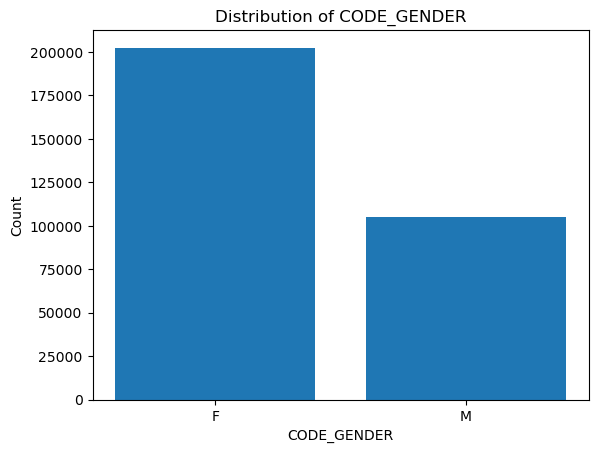

In [35]:
# 열 'CODE_GENDER'의 값들의 갯수를 계산
gender_counts = df['CODE_GENDER'].value_counts()

# 막대 그래프 그리기
plt.bar(gender_counts.index, gender_counts.values)

# 그래프 제목과 축 레이블 설정
plt.title("Distribution of CODE_GENDER")
plt.xlabel("CODE_GENDER")
plt.ylabel("Count")

# 그래프 출력
plt.show()

In [36]:
# 'CODE_GENDER'와 'TARGET' 간의 교차표 생성
cross_tab = pd.crosstab(df['CODE_GENDER'], df['TARGET'])

# 교차표 출력
print(cross_tab)

TARGET            0      1
CODE_GENDER               
F            188278  14170
M             94404  10655


In [37]:
df = pd.read_csv('~/workspace/230529 Infosolver/application_data.csv')

In [39]:
df['NAME_EDUCATION_TYPE'].unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

주어진 배열은 학력 수준을 나타내는 값들입니다. 각 값의 설명은 다음과 같습니다:

1. **'Secondary / secondary special'**: 중등교육 또는 중등특수교육을 나타냅니다. 이 학력은 중학교 이상의 교육을 받았으나 고등학교를 완료하지 않은 경우를 포함합니다.

2. **'Higher education'**: 고등교육을 나타냅니다. 이 학력은 대학교나 전문대학을 졸업하거나 학사 학위를 취득한 경우를 포함합니다.

3. **'Incomplete higher'**: 미완전한 고등교육을 나타냅니다. 이 학력은 대학교나 전문대학에 다니지만 학위를 취득하지 않은 경우를 의미합니다.

4. **'Lower secondary'**: 하급 중등교육을 나타냅니다. 이 학력은 초등학교를 졸업한 후 중학교를 이수한 경우를 의미합니다.

5. **'Academic degree'**: 학사 학위 이상의 학력을 나타냅니다. 이 학력은 대학원에서 석사 학위, 박사 학위 등을 취득한 경우를 포함합니다.

이러한 값들은 학력 수준을 구분하고 각 개인의 교육 수준을 파악하는 데 사용될 수 있습니다.

In [46]:
df['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [43]:
def classify_education_level(education_level):
    if education_level == 'Lower secondary':
        return 1
    elif education_level == 'Secondary / secondary special':
        return 0.8
    elif education_level == 'Incomplete higher':
        return 0.6
    elif education_level == 'Higher education':
        return 0.4
    elif education_level == 'Academic degree':
        return 0.2
    else:
        raise ValueError('Invalid education level')
        
# 'NAME_EDUCATION_TYPE' 열을 기준으로 등급 분류
df['NAME_EDUCATION_TYPE_RANK'] = df['NAME_EDUCATION_TYPE'].apply(classify_education_level)

In [44]:
df['NAME_EDUCATION_TYPE_RANK']

0         0.8
1         0.4
2         0.8
3         0.8
4         0.8
         ... 
307506    0.8
307507    0.8
307508    0.4
307509    0.8
307510    0.4
Name: NAME_EDUCATION_TYPE_RANK, Length: 307511, dtype: float64

In [45]:
# 상관관계 분석
correlation = df['NAME_EDUCATION_TYPE_RANK'].corr(df['TARGET'])
print('상관계수:', correlation)

# 회귀 분석
X = df['NAME_EDUCATION_TYPE_RANK']
y = df['TARGET']
X = sm.add_constant(X)  # 상수항 추가
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

상관계수: 0.05687151773087298
                            OLS Regression Results                            
Dep. Variable:                 TARGET   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     997.8
Date:                Mon, 29 May 2023   Prob (F-statistic):          1.20e-218
Time:                        22:21:47   Log-Likelihood:                -35949.
No. Observations:              307511   AIC:                         7.190e+04
Df Residuals:                  307509   BIC:                         7.192e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

## 회귀 분석 결과 해석

1. R-squared (결정 계수): 0.003
   - R-squared는 모델이 종속 변수의 변동성을 얼마나 설명하는지를 나타내는 지표입니다. 이 모델의 R-squared 값은 0.003으로 매우 낮습니다. 즉, 'NAME_EDUCATION_TYPE_RANK' 변수가 'TARGET' 변수의 변동성을 거의 설명하지 못한다는 것을 의미합니다.

2. Adj. R-squared (조정 결정 계수): 0.003
   - Adj. R-squared는 R-squared 값을 독립 변수의 개수와 관계하여 조정한 값입니다. 이 모델의 Adj. R-squared 값도 0.003으로 매우 낮습니다. 독립 변수로 'NAME_EDUCATION_TYPE_RANK'만 사용한 경우, 모델의 설명력이 매우 약하다는 것을 의미합니다.

3. F-statistic (F-통계량): 997.8
   - F-statistic은 회귀 모델의 적합도를 평가하는 지표 중 하나입니다. F-statistic 값이 크면 모델이 데이터에 적합하다는 의미입니다. 이 모델의 F-statistic 값은 997.8로 매우 크며, 이는 회귀 모델이 데이터에 상당히 적합하다는 것을 나타냅니다.

4. Prob (F-statistic) (F-통계량에 대한 p-value): 1.20e-218
   - Prob (F-statistic)는 F-통계량에 대한 p-value를 나타냅니다. p-value는 귀무 가설이 참일 때, 얻은 통계량이 관찰된 통계량보다 더 극단적인 값을 가질 확률을 의미합니다. 이 모델의 p-value 값은 매우 작은 값으로, 통계적으로 매우 유의미한 모델임을 나타냅니다.

5. coef (회귀 계수):
   - 'const'는 상수항의 회귀 계수를 나타냅니다. 이 모델에서는 0.0189입니다.
   - 'NAME_EDUCATION_TYPE_RANK'는 'TARGET'에 대한 'NAME_EDUCATION_TYPE_RANK'의 회귀 계수를 나타냅니다. 이 모델에서는 0.0886입니다. 이는 'NAME_EDUCATION_TYPE_RANK'이 'TARGET'에 대해 양의 방향으로 영향을 미친다는 것을 의미합니다.

6. std err (표준 오차):
   - 'const'와 'NAME_EDUCATION_TYPE_RANK'의 회귀 계수의 표준 오차를 나타냅니다.

7. t-value (t-통계량)

 및 P>|t| (각 회귀 계수에 대한 p-value):
   - t-value는 해당 계수가 0인지 아닌지를 판단하는 데 사용되는 통계량입니다. 절댓값이 클수록 해당 계수가 유의미하다는 것을 의미합니다.
   - P>|t|는 해당 계수가 유의미한지 여부를 나타내는 p-value를 의미합니다. 작은 값은 해당 계수가 통계적으로 유의미하다는 것을 나타냅니다.
   - 'const'의 경우, t-value는 9.362이며, P>|t| 값은 매우 작은 값인 0.000입니다. 따라서 'const' 계수는 통계적으로 유의미합니다.
   - 'NAME_EDUCATION_TYPE_RANK'의 경우, t-value는 31.588이며, P>|t| 값은 0.000입니다. 따라서 'NAME_EDUCATION_TYPE_RANK' 계수도 통계적으로 유의미합니다.

위의 결과를 종합해보면, 'NAME_EDUCATION_TYPE_RANK'와 'TARGET' 사이에는 약한 양의 상관관계가 있으며, 'NAME_EDUCATION_TYPE_RANK' 변수가 'TARGET' 변수를 설명하는 데 약간의 유의미한 영향을 미친다는 것을 알 수 있습니다. 그러나 모델의 설명력은 매우 낮으므로 다른 변수들과 함께 고려하는 것이 좋을 수 있습니다.
